# MTA_WEEK2_Data

### importing modules and data

In [223]:
cd ~

/home/kenan


In [224]:
cd Desktop/Metis_DS_BC_2022/MetisBC/Exploratory Data Analysis/Project_Turnstile_data/Data/turnstile/

/home/kenan/Desktop/Metis_DS_BC_2022/MetisBC/Exploratory Data Analysis/Project_Turnstile_data/Data/turnstile


In [225]:
# ls

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from functools import partial, reduce

In [227]:
# ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']

In [228]:
# get 1 month of data from 2021. say June

df_1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210724.txt')
df_2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210717.txt')
df_3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210710.txt')
df_4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210703.txt')
                

In [229]:
# make them all 1 data frame
data_frames = [df_1, df_2, df_3, df_4]
merged_data = pd.concat(data_frames)
merged_data.columns = [*merged_data.columns[:-1], 'EXITS']

In [230]:
# merged_data.info()

In [231]:
merged_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [232]:
merged_data.describe()
# numbers are too big

,ENTRIES,EXITS
count,8.382100e+05,8.382100e+05
mean,4.184664e+07,3.333131e+07
std,2.191175e+08,1.918541e+08
min,0.000000e+00,0.000000e+00
25%,2.176222e+05,9.999325e+04
50%,1.409656e+06,8.590205e+05
75%,6.043822e+06,3.973376e+06
max,2.147407e+09,2.122849e+09


In [233]:
merged_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,00:00:00,REGULAR,7603734,2600230
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,04:00:00,REGULAR,7603744,2600236
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,08:00:00,REGULAR,7603756,2600252
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,12:00:00,REGULAR,7603804,2600302
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,16:00:00,REGULAR,7603900,2600327
...,...,...,...,...,...,...,...,...,...,...,...
209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585
209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585
209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585
209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585


In [234]:
# convert into datetime
import datetime

In [235]:
merged_data["DATE_TIME"] = pd.to_datetime(merged_data.DATE + " " + merged_data.TIME,format="%m/%d/%Y %H:%M:%S")

In [236]:
merged_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,00:00:00,REGULAR,7603734,2600230,2021-07-17 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,04:00:00,REGULAR,7603744,2600236,2021-07-17 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,08:00:00,REGULAR,7603756,2600252,2021-07-17 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,12:00:00,REGULAR,7603804,2600302,2021-07-17 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/17/2021,16:00:00,REGULAR,7603900,2600327,2021-07-17 16:00:00


In [237]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(merged_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

# re-started this cell after inplace drop duplicates, so we cant see them now


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
753947,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 00:00:00,2
753948,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 04:00:00,2
753951,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 08:00:00,2
753952,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 12:00:00,2
558802,R138,R293,00-03-00,34 ST-PENN STA,2021-07-21 06:00:00,1
558793,R138,R293,00-03-00,34 ST-PENN STA,2021-07-19 18:00:00,1
558794,R138,R293,00-03-00,34 ST-PENN STA,2021-07-19 22:00:00,1
558795,R138,R293,00-03-00,34 ST-PENN STA,2021-07-20 02:00:00,1
558796,R138,R293,00-03-00,34 ST-PENN STA,2021-07-20 06:00:00,1
558797,R138,R293,00-03-00,34 ST-PENN STA,2021-07-20 10:00:00,1


In [238]:
merged_data.DESC.value_counts()

REGULAR       833721
RECOVR AUD      4489
Name: DESC, dtype: int64

In [239]:
# Get rid of the duplicate entry
merged_data.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
merged_data.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [240]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(merged_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,1
558807,R138,R293,00-03-00,34 ST-PENN STA,2021-07-22 02:00:00,1
558797,R138,R293,00-03-00,34 ST-PENN STA,2021-07-20 10:00:00,1
558798,R138,R293,00-03-00,34 ST-PENN STA,2021-07-20 14:00:00,1
558799,R138,R293,00-03-00,34 ST-PENN STA,2021-07-20 18:00:00,1


In [241]:
merged_data.DESC.value_counts()

REGULAR       833721
RECOVR AUD      4485
Name: DESC, dtype: int64

In [242]:
# MAY USE THIS LATER

# We can isolate specific turnstiles by creating boolean series masks,
# then using them to index into the dataframe: 
mask = ((merged_data["C/A"] == "A002") &
        (merged_data["UNIT"] == "R051") & 
        (merged_data["SCP"] == "02-00-00") & 
        (merged_data["STATION"] == "59 ST"))

merged_data[mask].head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
41,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/23/2021,20:00:00,REGULAR,7607384,2601535,2021-07-23 20:00:00
40,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/23/2021,16:00:00,REGULAR,7607137,2601500,2021-07-23 16:00:00
39,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/23/2021,12:00:00,REGULAR,7606965,2601460,2021-07-23 12:00:00
38,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/23/2021,08:00:00,REGULAR,7606913,2601365,2021-07-23 08:00:00
37,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/23/2021,04:00:00,REGULAR,7606898,2601319,2021-07-23 04:00:00


### Fix the columns and null values

In [243]:
def fix_the_columns(data):
    # Create 'DOW' (Day of Week) column from 'DATETIME'
    data['DOW'] = data[['DATE_TIME']].apply(lambda x: datetime.datetime.strftime(x['DATE_TIME'],'%A'), axis=1)
       
    #Drop unnecessary columns
    data = data.drop(['LINENAME', 'DIVISION', 'DATE', 'DESC','TIME'], axis=1) # , errors='ignore'

    return data

In [244]:
merged_data_2 = fix_the_columns(merged_data)
merged_data_2.head() , merged_data_2.columns
# got rid of useless columns and added Day_of_week

(          C/A  UNIT       SCP        STATION  ENTRIES  EXITS  \
 209398  TRAM2  R469  00-05-01  RIT-ROOSEVELT     5554    585   
 209397  TRAM2  R469  00-05-01  RIT-ROOSEVELT     5554    585   
 209396  TRAM2  R469  00-05-01  RIT-ROOSEVELT     5554    585   
 209395  TRAM2  R469  00-05-01  RIT-ROOSEVELT     5554    585   
 209394  TRAM2  R469  00-05-01  RIT-ROOSEVELT     5554    585   
 
                  DATE_TIME     DOW  
 209398 2021-07-23 21:00:00  Friday  
 209397 2021-07-23 17:00:00  Friday  
 209396 2021-07-23 13:00:00  Friday  
 209395 2021-07-23 09:00:00  Friday  
 209394 2021-07-23 05:00:00  Friday  ,
 Index(['C/A', 'UNIT', 'SCP', 'STATION', 'ENTRIES', 'EXITS', 'DATE_TIME',
        'DOW'],
       dtype='object'))

In [245]:
merged_data_2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'ENTRIES', 'EXITS', 'DATE_TIME',
       'DOW'],
      dtype='object')

In [246]:
merged_data.shape , merged_data_2.shape

((838206, 13), (838206, 8))

In [247]:
# any nulls?
merged_data_2.dropna(how='any',inplace=True)

In [248]:
merged_data_2.shape
#no nulls good.

(838206, 8)

In [249]:
# NO duplicates No null volues No nothing at this point. good to go

In [250]:
merged_data_2 = merged_data_2.sort_values(['STATION','DATE_TIME','C/A', 'UNIT', 'SCP'])
merged_data_2

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE_TIME,DOW
32888,H007,R248,00-00-00,1 AV,15583573,17884760,2021-06-26 00:00:00,Saturday
32930,H007,R248,00-00-01,1 AV,61323321,38537515,2021-06-26 00:00:00,Saturday
32972,H007,R248,00-03-00,1 AV,370891011,388156502,2021-06-26 00:00:00,Saturday
33014,H007,R248,00-03-01,1 AV,2624124,1157726,2021-06-26 00:00:00,Saturday
33056,H007,R248,00-03-02,1 AV,6681133,570404,2021-06-26 00:00:00,Saturday
...,...,...,...,...,...,...,...,...
183769,R419,R326,00-00-01,ZEREGA AV,242809,401448,2021-07-23 21:00:00,Friday
183811,R419,R326,00-03-00,ZEREGA AV,1169129,537152,2021-07-23 21:00:00,Friday
183853,R419,R326,00-03-01,ZEREGA AV,1278438,249157,2021-07-23 21:00:00,Friday
183895,R419,R326,00-05-00,ZEREGA AV,238,0,2021-07-23 21:00:00,Friday



### daily values and negative turnstiles? ( like week 2 example )

In [251]:
turnstiles_daily  = (merged_data_2.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False))['ENTRIES','EXITS','DOW'].first()
turnstiles_daily

/tmp/ipykernel_20286/1666397139.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily  = (merged_data_2.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False))['ENTRIES','EXITS','DOW'].first()


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,DOW
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,7592792,2595706,Saturday
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2595713,Saturday
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2595729,Saturday
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2595762,Saturday
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2595791,Saturday
...,...,...,...,...,...,...,...,...
838201,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-23 05:00:00,5554,585,Friday
838202,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-23 09:00:00,5554,585,Friday
838203,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-23 13:00:00,5554,585,Friday
838204,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-23 17:00:00,5554,585,Friday


In [252]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,DOW
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,7592792,2595706,Saturday
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2595713,Saturday
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2595729,Saturday
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2595762,Saturday
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2595791,Saturday


In [254]:
turnstiles_daily.shape

(838206, 8)

In [255]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES","EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

/tmp/ipykernel_20286/1258134588.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES","EXITS"]


In [256]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,DOW,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,7592792,2595706,Saturday,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2595713,Saturday,2021-06-26 00:00:00,7592792.0,2595706.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2595729,Saturday,2021-06-26 04:00:00,7592804.0,2595713.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2595762,Saturday,2021-06-26 08:00:00,7592816.0,2595729.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2595791,Saturday,2021-06-26 12:00:00,7592870.0,2595762.0


In [257]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,DOW,PREV_DATE,PREV_ENTRIES,PREV_EXITS
838201,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-23 05:00:00,5554,585,Friday,2021-07-23 01:00:00,5554.0,585.0
838202,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-23 09:00:00,5554,585,Friday,2021-07-23 05:00:00,5554.0,585.0
838203,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-23 13:00:00,5554,585,Friday,2021-07-23 09:00:00,5554.0,585.0
838204,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-23 17:00:00,5554,585,Friday,2021-07-23 13:00:00,5554.0,585.0
838205,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-23 21:00:00,5554,585,Friday,2021-07-23 17:00:00,5554.0,585.0


In [258]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [259]:
# reverse entries
turnstiles_daily[(turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]) | (turnstiles_daily["EXITS"] < turnstiles_daily["PREV_EXITS"])]

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,DOW,PREV_DATE,PREV_ENTRIES,PREV_EXITS
6551,A011,R080,01-03-00,57 ST-7 AV,2021-06-26 04:00:00,885595259,489554428,Saturday,2021-06-26 00:00:00,8.855953e+08,4.895545e+08
6552,A011,R080,01-03-00,57 ST-7 AV,2021-06-26 08:00:00,885595248,489554377,Saturday,2021-06-26 04:00:00,8.855953e+08,4.895544e+08
6553,A011,R080,01-03-00,57 ST-7 AV,2021-06-26 12:00:00,885595226,489554197,Saturday,2021-06-26 08:00:00,8.855952e+08,4.895544e+08
6554,A011,R080,01-03-00,57 ST-7 AV,2021-06-26 16:00:00,885595182,489553922,Saturday,2021-06-26 12:00:00,8.855952e+08,4.895542e+08
6555,A011,R080,01-03-00,57 ST-7 AV,2021-06-26 20:00:00,885595097,489553710,Saturday,2021-06-26 16:00:00,8.855952e+08,4.895539e+08
...,...,...,...,...,...,...,...,...,...,...,...
831157,R730,R431,00-00-04,EASTCHSTER/DYRE,2021-07-23 01:00:00,1559804078,1728251496,Friday,2021-07-22 21:00:00,1.559804e+09,1.728251e+09
831159,R730,R431,00-00-04,EASTCHSTER/DYRE,2021-07-23 09:00:00,1559804022,1728251509,Friday,2021-07-23 05:00:00,1.559804e+09,1.728251e+09
831160,R730,R431,00-00-04,EASTCHSTER/DYRE,2021-07-23 13:00:00,1559804004,1728251521,Friday,2021-07-23 09:00:00,1.559804e+09,1.728252e+09
831161,R730,R431,00-00-04,EASTCHSTER/DYRE,2021-07-23 17:00:00,1559803974,1728251547,Friday,2021-07-23 13:00:00,1.559804e+09,1.728252e+09


In [260]:
# almost 9k rows of data has this entry problem

In [261]:
# Let's see how many stations have this problem

(turnstiles_daily[(turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]) | (turnstiles_daily["EXITS"] < turnstiles_daily["PREV_EXITS"])]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         166
A013  R081  01-06-01  49 ST                1
A014  R081  02-00-00  49 ST                1
A049  R088  02-05-00  CORTLANDT ST         9
A066  R118  00-00-00  CANAL ST           167
                                        ... 
R532  R328  00-06-02  METS-WILLETS PT      1
R612  R057  01-05-00  ATL AV-BARCLAY       1
R622  R123  00-00-00  FRANKLIN AV        173
R728  R226  00-05-01  GUN HILL RD          1
R730  R431  00-00-04  EASTCHSTER/DYRE    153
Length: 128, dtype: int64

In [262]:
#  128 of them

In [263]:
# make a copy of the data set so far:
turntiles_daily_copy = turnstiles_daily.copy(deep=True)
### DEEP COPY HERE

In [283]:
# turnstiles_daily = turntiles_daily_copy
# reset here if things go bad later

In [282]:
def get_daily_entry_counts(row, max_counter):
    counter_entry = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter_entry < 0:
        # Maybe counter is reversed?
        counter_entry = -counter_entry
    if counter_entry > max_counter:
        # Maybe counter was reset to 0? 
        # print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter_entry = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter_entry > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter_entry

def get_daily_exit_counts(row, max_counter):
    counter_exit = row["EXITS"] - row["PREV_EXITS"]
    if counter_exit < 0:
        # Maybe counter is reversed?
        counter_exit = -counter_exit
    if counter_exit > max_counter:
        # Maybe counter was reset to 0? 
        # print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter_exit = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter_exit > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter_exit


# If counter is > 1Million, then the counter might have been reset.  
# used 100k for the max counter, lover than a million higher than daily possible
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_entry_counts, axis=1, max_counter=100000)
turnstiles_daily["DAILY_EXITS"] = turnstiles_daily.apply(get_daily_exit_counts, axis=1, max_counter=100000)
# turnstiles_daily

# given turnstile , if max,value() > std()*6 then mean+std*6?


In [284]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,DOW,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2595713,Saturday,2021-06-26 00:00:00,7592792.0,2595706.0,12.0,7.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2595729,Saturday,2021-06-26 04:00:00,7592804.0,2595713.0,12.0,16.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2595762,Saturday,2021-06-26 08:00:00,7592816.0,2595729.0,54.0,33.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2595791,Saturday,2021-06-26 12:00:00,7592870.0,2595762.0,122.0,29.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,7593116,2595809,Saturday,2021-06-26 16:00:00,7592992.0,2595791.0,124.0,18.0


In [285]:
turnstiles_daily.shape

(833193, 13)

In [286]:
turnstiles_daily.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
count,8.331930e+05,8.331930e+05,8.331930e+05,8.331930e+05,833193.000000,833193.000000
mean,4.184808e+07,3.333102e+07,4.184930e+07,3.333339e+07,62.546979,71.797388
std,2.191231e+08,1.918496e+08,2.191252e+08,1.918603e+08,324.980433,327.150591
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.176610e+05,1.000360e+05,2.176540e+05,1.000240e+05,4.000000,6.000000
50%,1.409791e+06,8.590960e+05,1.409840e+06,8.591030e+05,27.000000,30.000000
75%,6.044287e+06,3.973522e+06,6.044726e+06,3.973519e+06,84.000000,89.000000
max,2.147407e+09,2.122849e+09,2.147407e+09,2.122849e+09,89643.000000,87395.000000


In [287]:
turnstiles_daily.sort_values(["DAILY_ENTRIES","DAILY_EXITS"],ascending=[False,False]).head(25)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,DOW,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
198654,N029,R333,01-00-02,116 ST,2021-07-18 13:00:00,15,23,Sunday,2021-07-18 09:00:00,89658.0,161084.0,89643.0,15.0
518822,PTH22,R540,00-02-07,PATH NEW WTC,2021-07-09 11:28:39,49,22,Friday,2021-07-09 07:14:54,82792.0,24590.0,82743.0,24568.0
9334,A014,R081,02-00-00,49 ST,2021-07-12 04:00:00,14,6,Monday,2021-07-12 00:00:00,67653.0,34366.0,67639.0,34360.0
595508,R177,R273,01-00-01,145 ST,2021-07-15 20:00:00,37,137,Thursday,2021-07-15 12:00:00,65940.0,196071.0,65903.0,37.0
581605,R161B,R452,00-05-02,72 ST,2021-07-16 05:00:00,458753,0,Friday,2021-07-16 01:00:00,393368.0,0.0,65385.0,0.0
482738,PTH04,R551,00-04-01,GROVE STREET,2021-07-01 10:27:59,70448,76861,Thursday,2021-07-01 07:39:34,6385.0,3611.0,64063.0,73250.0
482739,PTH04,R551,00-04-01,GROVE STREET,2021-07-01 11:51:34,6425,3614,Thursday,2021-07-01 10:27:59,70448.0,76861.0,64023.0,73247.0
199261,N034,R334,01-00-00,CATHEDRAL PKWY,2021-07-08 09:00:00,67,65,Thursday,2021-07-07 13:00:00,59609.0,43656.0,59542.0,43591.0
500714,PTH16,R550,01-00-08,LACKAWANNA,2021-06-30 01:25:59,0,1,Wednesday,2021-06-29 21:24:43,56731.0,25695.0,56731.0,25694.0
487450,PTH06,R546,00-00-02,PAVONIA/NEWPORT,2021-07-14 07:31:16,51524,79982,Wednesday,2021-07-14 07:23:35,1.0,3.0,51523.0,79979.0


In [288]:
# type(turnstiles_daily["DATE_TIME"])

In [289]:
mask_2= ((turnstiles_daily["C/A"] == "N029") &
        (turnstiles_daily["UNIT"] == "R333") & 
        (turnstiles_daily["SCP"] == "01-00-02") & 
        (turnstiles_daily["STATION"] == "116 ST"))
        

abcd = turnstiles_daily[mask_2].sort_values("DATE_TIME",ascending=True)
abcd

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,EXITS,DOW,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
198524,N029,R333,01-00-02,116 ST,2021-06-26 05:00:00,89658,161084,Saturday,2021-06-26 01:00:00,89658.0,161084.0,0.0,0.0
198525,N029,R333,01-00-02,116 ST,2021-06-26 09:00:00,89658,161084,Saturday,2021-06-26 05:00:00,89658.0,161084.0,0.0,0.0
198526,N029,R333,01-00-02,116 ST,2021-06-26 13:00:00,89658,161084,Saturday,2021-06-26 09:00:00,89658.0,161084.0,0.0,0.0
198527,N029,R333,01-00-02,116 ST,2021-06-26 17:00:00,89658,161084,Saturday,2021-06-26 13:00:00,89658.0,161084.0,0.0,0.0
198528,N029,R333,01-00-02,116 ST,2021-06-26 21:00:00,89658,161084,Saturday,2021-06-26 17:00:00,89658.0,161084.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198682,N029,R333,01-00-02,116 ST,2021-07-23 05:00:00,2009,4357,Friday,2021-07-23 01:00:00,2006.0,4322.0,3.0,35.0
198683,N029,R333,01-00-02,116 ST,2021-07-23 09:00:00,2074,4453,Friday,2021-07-23 05:00:00,2009.0,4357.0,65.0,96.0
198684,N029,R333,01-00-02,116 ST,2021-07-23 13:00:00,2163,4627,Friday,2021-07-23 09:00:00,2074.0,4453.0,89.0,174.0
198685,N029,R333,01-00-02,116 ST,2021-07-23 17:00:00,2321,4867,Friday,2021-07-23 13:00:00,2163.0,4627.0,158.0,240.0


In [290]:
##### SOME TURNSTILES ARE F ed UP!

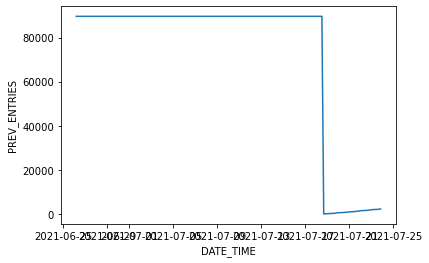

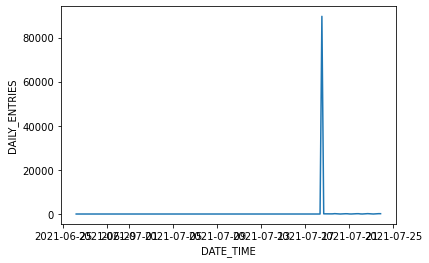

In [291]:
sns.lineplot(data = abcd, x = abcd.DATE_TIME, y = abcd.PREV_ENTRIES)
plt.show()
sns.lineplot(data = abcd, x = abcd.DATE_TIME, y = abcd.DAILY_ENTRIES)
plt.show()

In [292]:
### remove OUTLIERS:

In [293]:
# q = df["col"].quantile(0.99)
# and then filter with:
# df[df["col"] < q]

In [294]:
# before this process we had :
turnstiles_daily.shape
# 833193 rows

(833193, 13)

In [295]:
# make another copy in case
turnstiles_daily_copy_2 = turnstiles_daily

In [319]:
turnstiles_daily_copy_2.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
count,8.331930e+05,8.331930e+05,8.331930e+05,8.331930e+05,833193.000000,833193.000000
mean,4.184808e+07,3.333102e+07,4.184930e+07,3.333339e+07,62.546979,71.797388
std,2.191231e+08,1.918496e+08,2.191252e+08,1.918603e+08,324.980433,327.150591
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.176610e+05,1.000360e+05,2.176540e+05,1.000240e+05,4.000000,6.000000
50%,1.409791e+06,8.590960e+05,1.409840e+06,8.591030e+05,27.000000,30.000000
75%,6.044287e+06,3.973522e+06,6.044726e+06,3.973519e+06,84.000000,89.000000
max,2.147407e+09,2.122849e+09,2.147407e+09,2.122849e+09,89643.000000,87395.000000


In [297]:
# outlier mask:
outlier_mask_99p = turnstiles_daily["DAILY_ENTRIES"].quantile(0.99)
# remove ENTIRES FIRST
turnstiles_daily = turnstiles_daily[turnstiles_daily["DAILY_ENTRIES"]<outlier_mask_99p]
# remove EXITS NEXT
turnstiles_daily = turnstiles_daily[turnstiles_daily["DAILY_EXITS"]<outlier_mask_99p]

In [320]:
turnstiles_daily.describe()

,ENTRIES,EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_VOLUME
count,8.080570e+05,8.080570e+05,8.080570e+05,8.080570e+05,808057.000000,808057.000000,808057.000000
mean,4.153050e+07,3.279274e+07,4.153167e+07,3.279520e+07,54.554885,58.539563,113.094449
std,2.182792e+08,1.895693e+08,2.182813e+08,1.895804e+08,71.764297,75.816220,125.322580
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2.118670e+05,9.223200e+04,2.118550e+05,9.218700e+04,3.000000,5.000000,14.000000
50%,1.374400e+06,8.131280e+05,1.374409e+06,8.131460e+05,25.000000,28.000000,69.000000
75%,5.934194e+06,3.793066e+06,5.934202e+06,3.793039e+06,78.000000,82.000000,173.000000
max,2.147407e+09,2.122849e+09,2.147407e+09,2.122849e+09,392.000000,392.000000,780.000000


In [299]:
turnstiles_daily.shape
# we have lost 25k rows

(808057, 13)

In [300]:
turnstiles_daily["DAILY_VOLUME"] = turnstiles_daily["DAILY_ENTRIES"]+turnstiles_daily["DAILY_EXITS"]

In [301]:
# sort = tst.sort_values(tst.columns[0], ascending = False)

In [302]:
# sorted_turnstile = turnstiles_daily.sort_values(turnstiles_daily.columns[-1],ascending =False).head(25)
# sorted_turnstile

### further analysis

In [303]:
turnstiles_daily_2 = turnstiles_daily[["STATION","DATE_TIME","DOW","DAILY_VOLUME","DAILY_ENTRIES","DAILY_EXITS"]]
turnstiles_daily_2


,STATION,DATE_TIME,DOW,DAILY_VOLUME,DAILY_ENTRIES,DAILY_EXITS
1,59 ST,2021-06-26 04:00:00,Saturday,19.0,12.0,7.0
2,59 ST,2021-06-26 08:00:00,Saturday,28.0,12.0,16.0
3,59 ST,2021-06-26 12:00:00,Saturday,87.0,54.0,33.0
4,59 ST,2021-06-26 16:00:00,Saturday,151.0,122.0,29.0
5,59 ST,2021-06-26 20:00:00,Saturday,142.0,124.0,18.0
...,...,...,...,...,...,...
838201,RIT-ROOSEVELT,2021-07-23 05:00:00,Friday,0.0,0.0,0.0
838202,RIT-ROOSEVELT,2021-07-23 09:00:00,Friday,0.0,0.0,0.0
838203,RIT-ROOSEVELT,2021-07-23 13:00:00,Friday,0.0,0.0,0.0
838204,RIT-ROOSEVELT,2021-07-23 17:00:00,Friday,0.0,0.0,0.0


In [304]:
# Top Stations 
turnstiles_daily_stations = turnstiles_daily_2.groupby(['STATION'])['DAILY_VOLUME'].sum().sort_values(ascending = False).head(15)
turnstiles_daily_stations = pd.DataFrame(turnstiles_daily_stations.reset_index())
turnstiles_daily_stations = turnstiles_daily_stations.rename(columns={"DAILY_VOLUME":"MONTHLY_VOLUME"})

In [306]:
# STATION 	MONTHLY_VOLUME
# 0 	34 ST-PENN STA 	2970537.0
# 1 	34 ST-HERALD SQ 	2203743.0
# 2 	GRD CNTRL-42 ST 	2167650.0
# 3 	86 ST 	1913966.0
# 4 	42 ST-PORT AUTH 	1871411.0
# 5 	14 ST-UNION SQ 	1845010.0
# 6 	23 ST 	1736125.0
# 7 	TIMES SQ-42 ST 	1664548.0
# 8 	125 ST 	1663496.0
# 9 	FULTON ST 	1487872.0
# 10 	FLUSHING-MAIN 	1403361.0
# 11 	59 ST 	1350296.0
# 12 	JOURNAL SQUARE 	1349892.0
# 13 	CANAL ST 	1311848.0
# 14 	PATH NEW WTC 	1290773.0

# If we hadnt fix all the data

In [321]:
turnstiles_daily_stations

,STATION,MONTHLY_VOLUME
0,34 ST-PENN STA,2387105.0
1,23 ST,1584500.0
2,GRD CNTRL-42 ST,1456141.0
3,FULTON ST,1433568.0
4,125 ST,1395387.0
5,86 ST,1389038.0
6,34 ST-HERALD SQ,1346524.0
7,TIMES SQ-42 ST,1278424.0
8,42 ST-PORT AUTH,1227662.0
9,59 ST,1201790.0


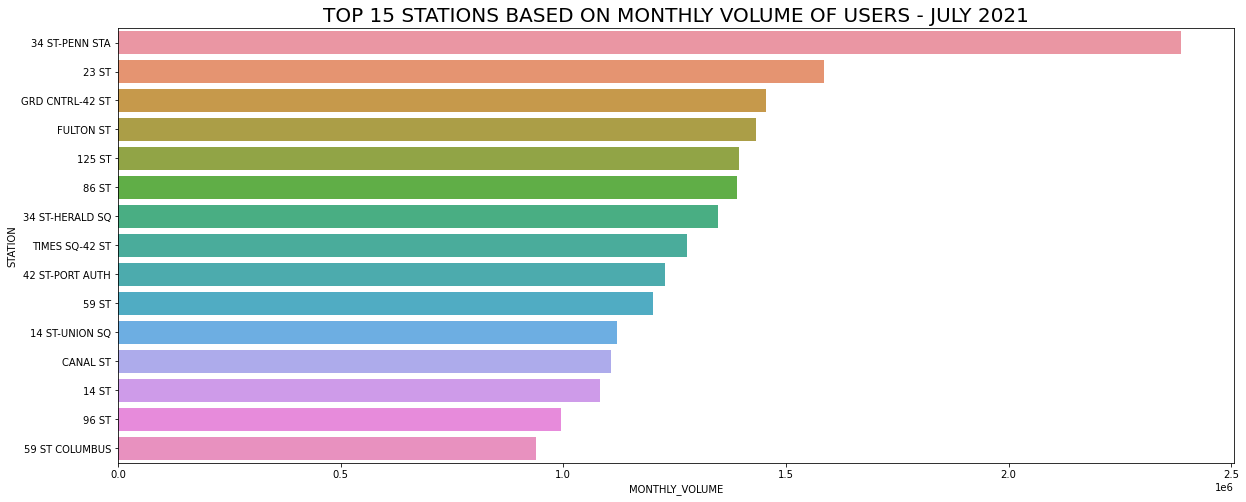

In [322]:
#Plot graph for TOP 15 STATIONS BASED ON MONTHLY RIDERSHIP - AUGUST 2020
plt.figure(figsize=(20,8))
plt.title('TOP 15 STATIONS BASED ON MONTHLY VOLUME OF USERS - JULY 2021',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.barplot(data = turnstiles_daily_stations, y = turnstiles_daily_stations.STATION, x = turnstiles_daily_stations.MONTHLY_VOLUME)
plt.show()


In [323]:
#Focus on Day of Week 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
turnstiles_daily_2_DOW = turnstiles_daily_2.groupby(['DOW'])['DAILY_VOLUME'].sum().reset_index()
turnstiles_daily_2_DOW['DOW'] = pd.Categorical(turnstiles_daily_2_DOW['DOW'], categories=days, ordered=True)
turnstiles_daily_2_DOW = turnstiles_daily_2_DOW.sort_values('DOW')
turnstiles_daily_2_DOW


,DOW,DAILY_VOLUME
1,Monday,13189767.0
5,Tuesday,14191817.0
6,Wednesday,14427449.0
4,Thursday,14559952.0
0,Friday,14242986.0
2,Saturday,10900963.0
3,Sunday,9873827.0


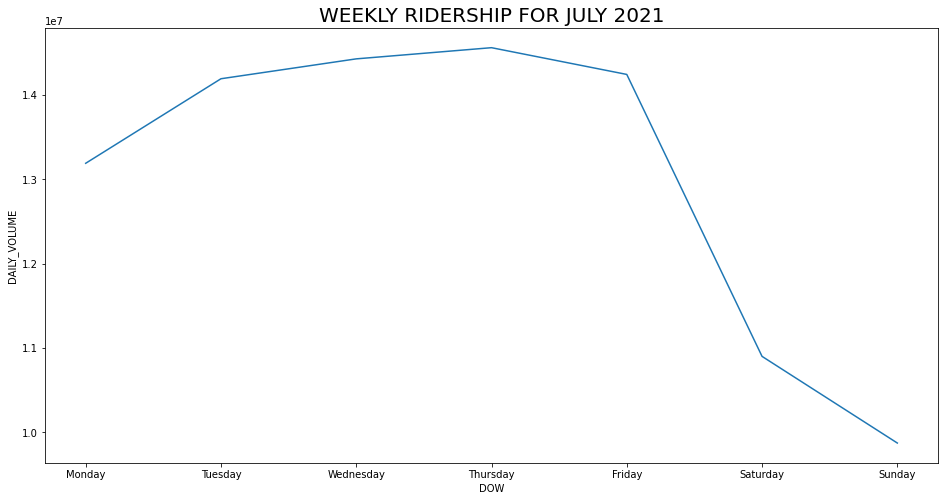

In [324]:
#Plot graph for WEEKLY RIDERSHIP FOR JULY 2021
plt.figure(figsize=(16,8))
plt.title('WEEKLY RIDERSHIP FOR JULY 2021',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.lineplot(data = turnstiles_daily_2_DOW, x = turnstiles_daily_2_DOW.DOW, y = turnstiles_daily_2_DOW.DAILY_VOLUME)
plt.show()


/tmp/ipykernel_20286/3490050577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turntiles_top_5_stations_monthly['DOW'] = pd.Categorical(turntiles_top_5_stations_monthly['DOW'], categories=days, ordered=True)


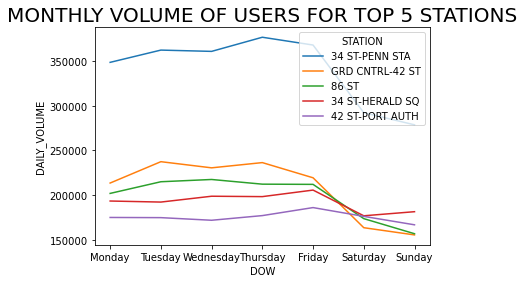

In [326]:
# Plot graph for MONTHLY TRAFFIC FOR TOP 3 STATIONS
turnstiles_station_dow = turnstiles_daily_2.groupby(['STATION', 'DOW'])['DAILY_VOLUME'].sum().sort_values(ascending = False).reset_index()
turntiles_top_5_stations_monthly = turnstiles_station_dow[turnstiles_station_dow['STATION'].isin(['34 ST-PENN STA', '34 ST-HERALD SQ', 'GRD CNTRL-42 ST','86 ST','42 ST-PORT AUTH'])]
turntiles_top_5_stations_monthly
# days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
turntiles_top_5_stations_monthly['DOW'] = pd.Categorical(turntiles_top_5_stations_monthly['DOW'], categories=days, ordered=True)

plt.title('MONTHLY VOLUME OF USERS FOR TOP 5 STATIONS',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.lineplot(data = turntiles_top_5_stations_monthly, x = turntiles_top_5_stations_monthly.DOW, y = turntiles_top_5_stations_monthly.DAILY_VOLUME, hue = 'STATION')
plt.show()
